In [1]:
%load_ext autoreload
%autoreload 2

# External imports
import polars as pl
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Local imports
from fart.common.constants import (DATETIME, TIMESTAMP, OPEN, HIGH, LOW, VOLUME)
from fart.features.calculate_technical_indicators import calculate_technical_indicators
from fart.features.parse_timestamp_to_datetime import parse_timestamp_to_datetime
from fart.features.trade_signals import TradeSignals
from fart.model.train_test_split import train_test_split
from fart.visualization.plot_confusion_matrix import plot_confusion_matrix

In [2]:
# Load data and calculate technical indicators
df = pl.read_csv("../data/BTC-EUR.csv")
df = parse_timestamp_to_datetime(df)
df = calculate_technical_indicators(df)

# Generate trading signals based on technical indicators
trade_signals = TradeSignals(df)
trade_signals.generate()
trade_signals.optimize()

# Assign processed data to df
df = trade_signals.df

In [3]:
# Drop irrelevant features
df = df.drop([DATETIME, TIMESTAMP, OPEN, HIGH, LOW, VOLUME])

# Drop NaNs
df = df.drop_nans()

In [4]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     19396
           1       0.48      0.09      0.16       436
           2       0.72      0.53      0.61       436

    accuracy                           0.96     20268
   macro avg       0.72      0.54      0.58     20268
weighted avg       0.95      0.96      0.96     20268



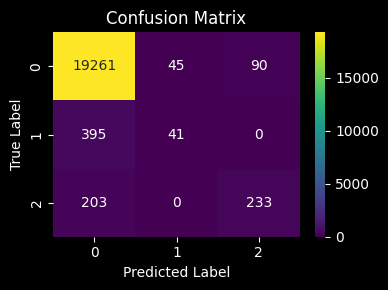

In [5]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Define pipeline and fit model
pipeline = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=0,
    ),
)
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     19396
           1       0.41      0.13      0.19       436
           2       0.68      0.56      0.62       436

    accuracy                           0.96     20268
   macro avg       0.69      0.56      0.60     20268
weighted avg       0.95      0.96      0.96     20268



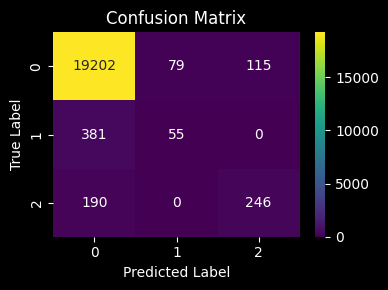

In [6]:
# XGBoost Classifier
from xgboost import XGBClassifier

# Define pipeline and fit model
pipeline = make_pipeline(StandardScaler(), XGBClassifier())
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred)

In [7]:
# LightGBM Classifier

In [8]:
# CatBoost Classifier

In [9]:
# Extra Trees Classifier

In [10]:
# Stochastic Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     19396
           1       0.46      0.10      0.16       436
           2       0.69      0.53      0.60       436

    accuracy                           0.96     20268
   macro avg       0.71      0.54      0.58     20268
weighted avg       0.95      0.96      0.95     20268



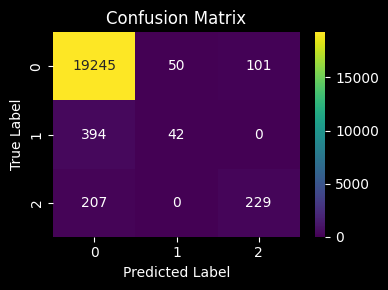

In [11]:
# Histogram-based Gradient Boosting Classifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Define pipeline and fit model
pipeline = make_pipeline(StandardScaler(), HistGradientBoostingClassifier())
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred)

In [12]:
# NGBoost Classifier

In [13]:
# MART Classifier